<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.integrate import odeint

# Anti-derivatives, Inverse Tangents, and Differential Equations

Many of the important early problems surrounding the mathematical circles of Leibniz and Newton involved what we now call differential equations and what they called the inverse tangent problem.  For example, we can write the equation

$$\frac{dy}{dx} = 2x + 3$$

This equation is giving us information about the tangent lines of a relationship.  Whatever this relationship is, we know the slope of the tangent line at any point $(x,y)$ is simply $2x +3$.  

What we want, is to determine a relationship that satisfies these requirements.  The example above is easy enough to see that a possible solution is 

$$y = x^2 + 3x$$

In [2]:
def dy(x):
    return 2*x + 3

x = sy.Symbol('x')
anti_d = sy.integrate(2*x+3, x)
sy.pprint(anti_d)

 2      
x  + 3⋅x


We can check the work by seeing that the derivative of our antiderivative is what we started with.

In [3]:
sy.diff(anti_d, x)

2*x + 3

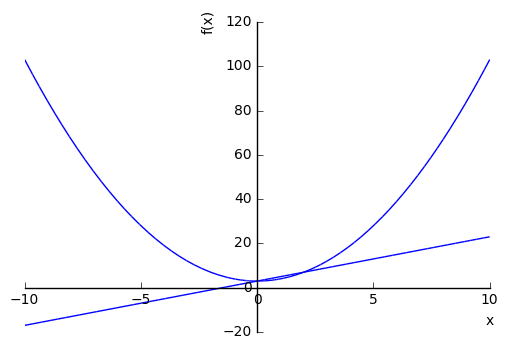

In [4]:
sy.plot(x**2 + 3, 2*x + 3)

## Familiar Examples

We can frame a few familiar examples in terms of differential equations.  In doing so, we express a relationship involving a rate of change.  The above example could be interpreted as asking for a relationship whose rate of change is a linear function with a rate of change of 1 unit of $x$.  We can similarly consider some sequence whose differences are changing in a linear fashion. 

### Compound Interest

In compound interest, we know that each compounding period $t$ results in multiplying the amount in the account $A$ by the interest rate $r$.  In terms of differential equations, we would have that the rate of change of the investment $A$ is proportional to the amount present.  

$$\frac{dA}{dt} = rA$$

We can use SymPy to find a solution to this, which should verify our existing knowledge of the solution.

In [5]:
t, A, r, P = sy.symbols('t A r P')

In [6]:
A = sy.Function("A")(t)
A_ = sy.Derivative(A, t)
P = sy.Symbol('P')

In [7]:
b = sy.Eq(A_, r*A)

In [8]:
soln = sy.dsolve(b)
sy.pprint(soln)

           r⋅t
A(t) = C₁⋅ℯ   


We find that we are given the solution with some other constant $C_1$.  We will examine this in more detail in just a second, but for now let's visit some familiar examples to get used to solving the differential equations in SymPy.

### Introductory Examples

Solve the differential equation with Sympy:

- $\frac{dy}{dx} = y^2$


- $4x^2\frac{d^2y}{dx^2} + y = 0$

- $y' + 2xy^2 = 0$

- $y' = y + 2e^{-x}$

## Families of AntiDerivatives

One of the issues with antiderivatives is that they are not unique.  For example, our first differential equation actually has an infinite number of solutions of the form

$$y = \frac{x^2}{2} + 2x + c$$

where $c$ is any real number.  We can see this by checking some values of $c$.

In [9]:
y2 = x**2 + 3*x - 1
y3 = x**2 + 3*x -2
y4 = x**2 + 3*x + 1
y5 = x**2 + 3*x + 2

In [10]:
dy2 = sy.diff(y2, x)
dy3 = sy.diff(y3, x)
dy4 = sy.diff(y4, x)
dy5 = sy.diff(y5, x)

In [11]:
dy2, dy3, dy4, dy5

(2*x + 3, 2*x + 3, 2*x + 3, 2*x + 3)

If we look at the plots of these different solutions, we see some similarities and differences.

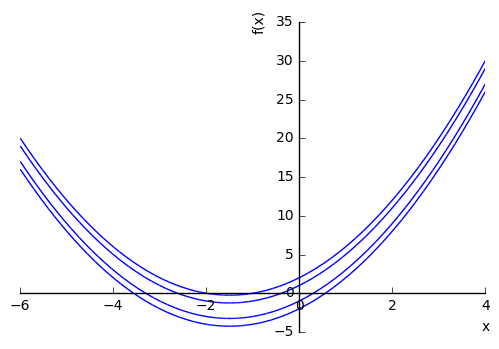

In [12]:
sy.plot(y2, y3, y4, y5, (x, -6,4))

In a similar manner, explore alternative values for the constants of integration and plot the solutions to your earlier problems.

## Initial Value Problems

Now, we will suppose that we know a certain point on the curve that the solution passes through.  For example, or early example began with the differential equation 

$$\frac{dy}{dx} = 2x+3$$

We found that the solutions to this equation take the form

$$y = x^2 + 3x + C$$

where $C$ is some constant.  

In [13]:
y = sy.Function("y")(x)
dy = sy.Derivative(y, x)
diff_eq = sy.Eq(dy, 2*x + 3)
soln = sy.dsolve(diff_eq)
sy.pprint(soln)

             2      
y(x) = C₁ + x  + 3⋅x


We may know some additional information however.  Suppose we knew that the solution that we wanted passed through the point $(1, 2)$.  This would mean that if we substitute for each of these values, we should get a true statement.  We can find a value for $C_1$ then, that would make this true.

In [14]:
c = sy.Symbol('c')
initial_value = sy.Eq(2, 1**2 + 3*1 + c)
sy.solve(initial_value, c)

[-2]

Hence, we have that

$$y = x^2 + 3x -2$$

We find a more general solution for our compound interest problem in a similar manner where we have the initial investment $P$ at time $t=0$.

In [15]:
P = sy.Symbol('P')
initial_value = sy.Eq(P, c*sy.exp(r*0))
sy.solve(initial_value, c)

[P]

Hence, we have our solution as

$$y = Pe^{rt}$$

## Motion as Differential Equation

Before, we investigated the relationships between *displacement, velocity,* and *acceleration*.  In the language of differential equations, we can phrase this as

$$a = \frac{dv}{dt} = \frac{d^2x}{dt^2}$$

where we have

$x = f(t)$

for the motion of some particle along the $x$-axis.

In [16]:
a = sy.Symbol('a')
v = sy.Function("v")(t)
dv = sy.Derivative(v, t)
diff_eq = sy.Eq(dv, a)
soln = sy.dsolve(diff_eq)
sy.pprint(soln)

v(t) = C₁ + a⋅t


In [17]:
v0 = sy.Symbol('v0')
initial_value = sy.Eq(c + a*0, v0)
sy.solve(initial_value, c)

[v0]

In [18]:
x = sy.Function("x")(t)
dx = sy.Derivative(x, t)
diff_eq = sy.Eq(dx, v0 + a*t)
soln2 = sy.dsolve(diff_eq)
sy.pprint(soln2)

               2       
            a⋅t        
x(t) = C₁ + ──── + t⋅v₀
             2         


Thus we have

$$v(t) = at + v_0$$

and

$$x(t) = \frac{1}{2}at^2 + v_0 t + x_0$$

### Problems

Fintd the position function $x(t)$ for some particle given the information about the constant acceleration $a$, the initial velocity $v_0$, and initial position $x_0$.

- $a(t) = 40, v_0 = 5, x_0 = 10$

- $a(t) = -2, v_0 = 20, x_0 = 34$

- $a(t) = 3t, v_0 = 2, x_0 = 4$



## Force and Gravitational Acceleration

One of the accomplishments of Newton's *Principia* was to set down laws of motion that were developed by assuming a universal force of gravity acting on all bodies.  The acceleration due to the Earth's gravity is approximated by 9.8 $m/s^2$.  Further, we can define the *weight* of a body as the force exerted by gravity on a body.  Newton's second law states that the Force on any body is equal to its mass times acceleration.  We call the unit of force required to move impart an acceleration of 1 $m/s^2$ to a mass of 1 kg a Newton.

Thus, we have that $W = mg$.  

Returning to our problems with motion, we note that we view the action on bodies on Earth as an acceleration due to gravity $g$, hence we have 

$$a = \frac{dv}{dt}$$

$$v(t) = -gt + v_0$$

$$y(t) = \frac{-1}{2}gt^2 + v_0t + y_0$$

and can use these equations to solve some basic problems dealing with bodies in motion on Earth.  For example, suppose we throw a ball straight up from the ground with an initial velocity $v_0 = 90$ ft/sec, hence it reaches its maximum height when the velocity is zero, or

$$v(t) = -32t +96 = 0$$

or 

$$t = 3$$

so we have a maximum height of 

$$y(3) = -1/2(32)(3^2) + 96(3) + 0 = 144ft$$


### Problems


- A projectile is fired straight up from the top of a building 30m high, with initial velocity of 40m/s.  Find its maximum height above the ground, when it passes the top of the building and its time in the air.

- A bomb is dropped from a helicopter hovering at an altitude of 800 feet above the ground.  From the ground directly beneath the helicopter, a projectile is fired straight upward toward the bomb, exacly 2 seconds after the bomb is released.  With waht initial velocity should the projectile be fired, in order to hit the bomb at nan altitude of exacly 400 feet?